In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import os

# Data description

Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trjectories: 260
Test trajectories: 259
Conditions: SIX 
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trjectories: 248
Test trajectories: 249
Conditions: SIX 
Fault Modes: TWO (HPC Degradation, Fan Degradation)



Experimental Scenario

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine Ц i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:
1)	unit number
2)	time, in cycles
3)	operational setting 1
4)	operational setting 2
5)	operational setting 3
6)	sensor measurement  1
7)	sensor measurement  2
...
26)	sensor measurement  26


Reference: A. Saxena, K. Goebel, D. Simon, and N. Eklund, УDamage Propagation Modeling for Aircraft Engine Run-to-Failure SimulationФ, in the Proceedings of the Ist International Conference on Prognostics and Health Management (PHM08), Denver CO, Oct 2008.


# Read data

In [2]:
cols = ['unit number', 'time in cycles', 'operational setting 1', 'operational setting 2', 'operational setting 3']
cols += ['sensor '+str(i) for i in range(1, 24)]

data_train = pd.read_csv("../data/CMAPSSData/train_FD001.txt", sep=' ', names=cols)
data_train = data_train[cols[:-2]]

In [3]:
data_train.head()

unit number  time in cycles  operational setting 1  operational setting 2  \
0            1               1                -0.0007                -0.0004   
1            1               2                 0.0019                -0.0003   
2            1               3                -0.0043                 0.0003   
3            1               4                 0.0007                 0.0000   
4            1               5                -0.0019                -0.0002   

   operational setting 3  sensor 1  sensor 2  sensor 3  sensor 4  sensor 5  \
0                  100.0    518.67    641.82   1589.70   1400.60     14.62   
1                  100.0    518.67    642.15   1591.82   1403.14     14.62   
2                  100.0    518.67    642.35   1587.99   1404.20     14.62   
3                  100.0    518.67    642.35   1582.79   1401.87     14.62   
4                  100.0    518.67    642.37   1582.85   1406.22     14.62   

     ...      sensor 12  sensor 13  sensor 14  sensor 15  sensor 16  \
0    ...         521.66    2388.02    8138.62     8.4195       0.03   
1    ...         522.28    2388.07    8131.49     8.4318       0.03   
2    ...         522.42    2388.03    8133.23     8.4178       0.03   
3    ...         522.86    2388.08    8133.83     8.3682       0.03   
4    ...         522.19    2388.04    8133.80     8.4294       0.03   

   sensor 17  sensor 18  sensor 19  sensor 20  sensor 21  
0        392       2388      100.0      39.06    23.4190  
1        392       2388      100.0      39.00    23.4236  
2        390       2388      100.0      38.95    23.3442  
3        392       2388      100.0      38.88    23.3739  
4        393       2388      100.0      38.90    23.4044  

[5 rows x 26 columns]

# Data processing

In [4]:
np.unique(data_train['unit number'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [5]:
units = []

for i_unit in np.unique(data_train['unit number']):
    
    data_unit = data_train[data_train['unit number'] == i_unit]
    max_time_in_cycles = np.max(data_unit['time in cycles'])
    data_unit['RUL'] = max_time_in_cycles - data_unit['time in cycles']
    units.append(data_unit)

# Data display

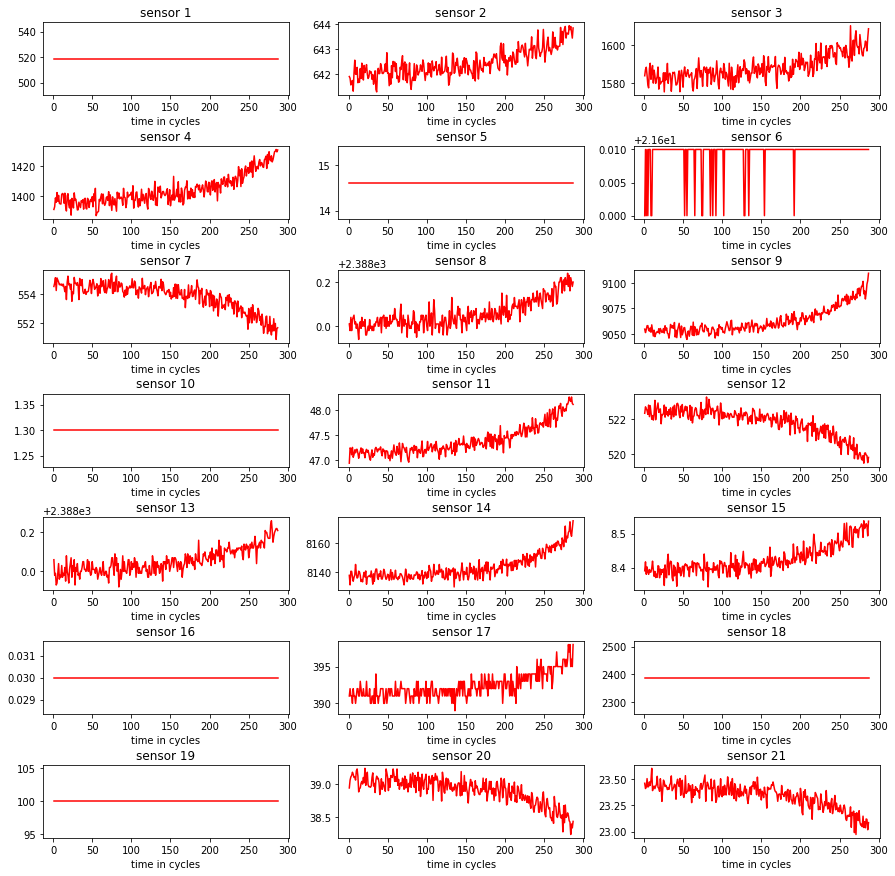

In [6]:
data_unit = units[1]

plt.figure(figsize=(15, 15))

for i in range(1, 22):
    
    y = data_unit['sensor '+str(i)].values
    x = data_unit['time in cycles'].values
    
    plt.subplot(7, 3, i)
    plt.plot(x, y, color='r')
    plt.xlabel('time in cycles')
    plt.title('sensor '+str(i))
    
plt.subplots_adjust(hspace=0.7)    
plt.show()

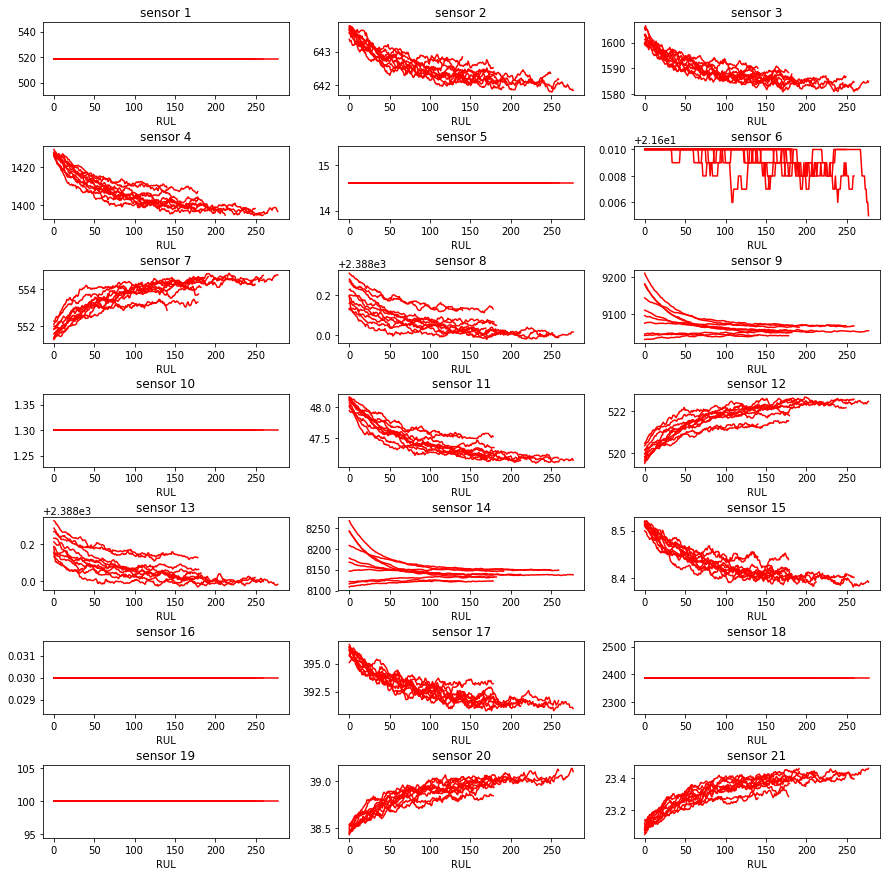

In [7]:
data_unit = units[1]

plt.figure(figsize=(15, 15))

for i in range(1, 22):
    
    plt.subplot(7, 3, i)
    
    for data_unit in units[:10]:
        y = data_unit['sensor '+str(i)].values
        y = pd.rolling_mean(y, 10)
        x = data_unit['RUL'].values

        plt.plot(x, y, color='r')
    
    plt.xlabel('RUL')
    plt.title('sensor '+str(i))
    
plt.subplots_adjust(hspace=0.7)    
plt.show()

# Regression

In [8]:
# Unite all units
all_units = pd.concat(units, axis=0)

In [9]:
# Train / test split
units_train = all_units[all_units['unit number'] < 80]
units_test = all_units[all_units['unit number'] >= 80]

x_cols = cols[2:-2]

X_train = units_train[x_cols]
X_test = units_test[x_cols]

y_train = units_train['RUL']
y_test = units_test['RUL']

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Fit model
reg = RandomForestRegressor(n_estimators=100, max_features=None)
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
# Make prediction
y_test_pred = reg.predict(X_test)

Test RMSE:  50.342639681003064


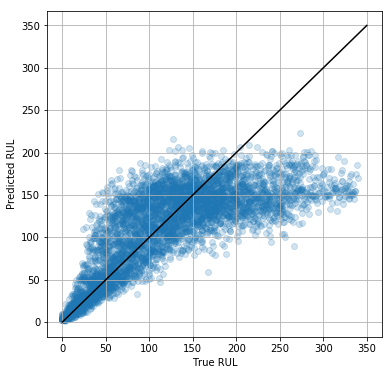

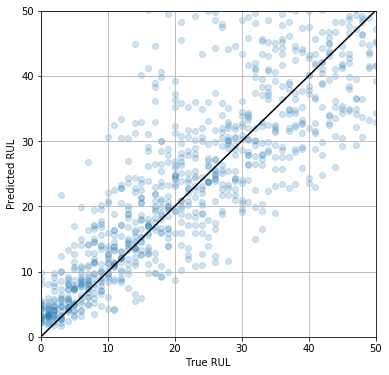

In [12]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE: ", rmse)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.2)
plt.plot([0, 350], [0, 350], color='0')
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.grid(b=1)
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.2)
plt.plot([0, 50], [0, 50], color='0')
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.grid(b=1)
plt.show()

# Classification

In [13]:
# Train / test split
units_train = all_units[all_units['unit number'] < 80]
units_test = all_units[all_units['unit number'] >= 80]

x_cols = cols[2:-2]

X_train = units_train[x_cols]
X_test = units_test[x_cols]

rul_thresh = 50

y_train = units_train['RUL'] < rul_thresh
y_test = units_test['RUL'] < rul_thresh

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Fit model
clf = RandomForestClassifier(n_estimators=100, max_features=None)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
# Make prediction
y_test_pred = clf.predict_proba(X_test)[:, 1]

ROC AUC:  0.9698062687037329


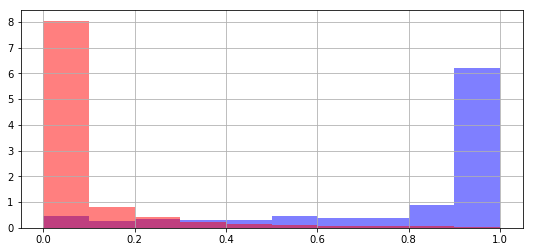

In [16]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_test_pred)
print("ROC AUC: ", auc)

plt.figure(figsize=(9, 4))
plt.hist(y_test_pred[y_test == 1], color='b', alpha=0.5, normed=True, label='1')
plt.hist(y_test_pred[y_test == 0], color='r', alpha=0.5, normed=True, label='0')
plt.grid(b=1)
plt.show()

# Задания

1. Улучшите качество прогноза регрессии. Как именно Вы будуте это делать?
2. Улучшите качество классификации. Как именно Вы будуте это делать?